# Lab2 - Analiza danych - DataFrames

### Zadania 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

### Dot product between two vectors

In [1]:
using LinearAlgebra

In [2]:
function Dot(v1,v2)
    return sum(a*b for (a,b) in zip(v1, v2))
end

Dot (generic function with 1 method)

#### Check

In [3]:
Dot([10,2,2,25],[23,43,124,42211]) == dot([10,2,2,25],[23,43,124,42211])

true

### Matrix-vector product

In [4]:
# matrix-vector multiplication (M x X) is dot product of each row of M with X
# result - uninitialized 1d Array containing elements of type Float64

function multmatvec(M, X)::Array{Float64,1}
    result = Array{Float64}(undef, 0)
    for row = 1:size(M,1)
        d = Dot(M[row,:],X)
        push!(result,d)
    end
    return result
end
    

multmatvec (generic function with 1 method)

#### Check

In [5]:
A = [1 -1 2; 0 -3 1]
X = [2 1 0]
res = multmatvec(A,X)
show(res)

[1.0, -3.0]

### Execution time
Save as DataFrame and CSV file

In [6]:
using DataFrames

In [7]:
res = DataFrame(size = Int[], i = Int[], dot_time = Float64[], prod_time = Float64[])

for size in 600:300:6000
    for i in 1:10
        M = rand(1:size,(size,size))
        V1 = rand(1:size, size)
        V2 = rand(1:size, size)
        dot_time = @elapsed Dot(V1,V2)
        prod_time = @elapsed multmatvec(M,V1)
        push!(res, [size i dot_time prod_time])
    end
end
res

,size,i,dot_time,prod_time
,Int64,Int64,Float64,Float64
1,600,1,4.99e-7,0.001368
2,600,2,6.0e-7,0.0015988
3,600,3,5.0e-7,0.0025575
4,600,4,7.0e-7,0.0022323
5,600,5,4.0e-7,0.0021383
6,600,6,2.99e-7,0.0553135
7,600,7,4.0e-7,0.0023063
8,600,8,4.0e-7,0.0022219
9,600,9,4.0e-7,0.0025407


In [8]:
using CSV
CSV.write("results.csv", res)

"results.csv"

### Mean and standard deviation + plots

In [9]:
using Statistics

In [10]:
res_grouped = combine(groupby(res, :size), "dot_time" => mean, "prod_time" => mean, "dot_time" => std, "prod_time" => std)

,size,dot_time_mean,prod_time_mean,dot_time_std,prod_time_std
,Int64,Float64,Float64,Float64,Float64
1,600,4.597e-7,0.00743458,1.1755e-7,0.0168271
2,900,5.799e-7,0.0143603,9.15101e-8,0.0280487
3,1200,1.0801e-6,0.0101944,3.42546e-7,0.00137623
4,1500,1.2798e-6,0.0202464,4.15815e-7,0.00340949
5,1800,1.23e-6,0.028771,1.2508e-7,0.00214424
6,2100,1.3997e-6,0.0425916,1.56136e-7,0.00132521
7,2400,1.59e-6,0.0728666,1.59375e-7,0.0235507
8,2700,1.7399e-6,0.0793747,1.64682e-7,0.00234537
9,3000,1.8701e-6,0.0990034,1.64e-7,0.00436109


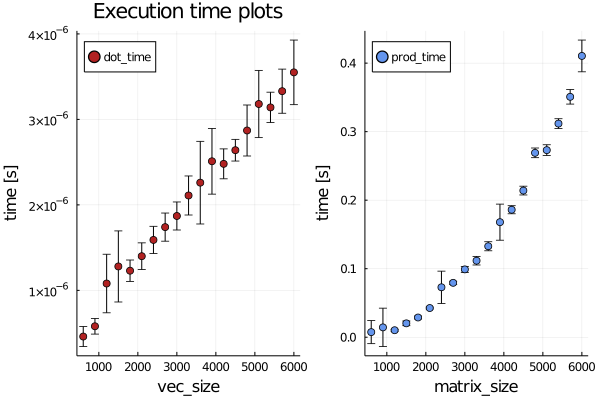

In [11]:
using Plots
dot_plot = scatter(res_grouped.size, res_grouped.dot_time_mean, colour = :firebrick , yerr=res_grouped.dot_time_std,
            xlabel = "vec_size", ylabel = "time [s]", label = "dot_time", title = "Execution time plots", legend = :topleft)
prod_plot = scatter(res_grouped.size, res_grouped.prod_time_mean, colour = :cornflowerblue , yerr=res_grouped.prod_time_std,
            xlabel = "matrix_size", ylabel = "time [s]", label = "prod_time", legend = :topleft)
plot(dot_plot, prod_plot, layout = 2)

As expected:
- time of calculating the dot product grows linearly with size of vectors ($N$)
- time of calculating the matrix-vector product grows quadratically with size of matrix ($N$x$N$)